# **Introducción**
Para este proyecto he decidido trabajar con el conjunto de datos “Bank Marketing” disponible en Kaggle. Esta base de datos proviene de una campaña de marketing directo de un banco portugués, cuyo objetivo era promover depósitos a plazo fijo mediante llamadas telefónicas. Cada fila del dataset representa un cliente contactado, incluyendo tanto características personales (edad, profesión, estado civil) como información sobre la interacción (número de contactos previos, duración de la llamada, resultados anteriores, etc.). La variable objetivo (y) indica si el cliente finalmente aceptó o no la oferta del producto.

# Fuente
Los datos utilizados se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/mahdiehhajian/bank-marketing

In [4]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Coderhouse/Data Science/Entrega 1/data.csv',sep=';')
df.head(10)


Mounted at /content/drive


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Descripción de las columnas del dataset

A continuación se detallan las variables incluidas en el conjunto de datos:

A continuación se detallan las variables incluidas en el conjunto de datos:

* age: Edad del cliente (dato numérico).
* job: Tipo de trabajo del cliente (por ejemplo: 'admin.', 'technician', etc.).
* marital: Estado civil del cliente (soltero, casado, divorciado, etc.).
* education: Nivel educativo alcanzado.
* default: Indica si el cliente tiene créditos en mora ('yes', 'no', 'unknown').
* housing: Indica si el cliente tiene préstamo hipotecario ('yes', 'no').
* loan: Indica si el cliente tiene algún otro préstamo personal ('yes', 'no').
* contact: Medio de contacto utilizado en la campaña (celular, teléfono fijo).
* month: Mes del año en el que se realizó el último contacto de la campaña.
* day_of_week: Día de la semana en que se realizó el contacto.
* duration: Duración del último contacto (en segundos).
* campaign: Número de contactos realizados durante esta campaña.
* pdays: Días desde el último contacto previo (999 indica que no hubo contacto anterior).
* previous: Número de contactos realizados antes de esta campaña.
* poutcome: Resultado de campañas anteriores (éxito, fracaso, inexistente).
* emp.var.rate: Tasa de variación del empleo (indicador macroeconómico).
* cons.price.idx: Índice de precios al consumidor.
* cons.conf.idx: Índice de confianza del consumidor.
* euribor3m: Tipo de interés euribor a 3 meses.
* nr.employed: Número de empleados (en miles), como indicador macroeconómico.
* y: Variable objetivo. Indica si el cliente ha suscrito un depósito a plazo fijo ('yes' o 'no').

## Exploración de Datos


In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/Coderhouse/Data Science/Entrega 1/data.csv',sep=';')
len(df)

41188

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/Coderhouse/Data Science/Entrega 1/data.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
df.describe().round(1)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.3,2.6,962.5,0.2,0.1,93.6,-40.5,3.6,5167.0
std,10.4,259.3,2.8,186.9,0.5,1.6,0.6,4.6,1.7,72.3
min,17.0,0.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6
25%,32.0,102.0,1.0,999.0,0.0,-1.8,93.1,-42.7,1.3,5099.1
50%,38.0,180.0,2.0,999.0,0.0,1.1,93.7,-41.8,4.9,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.4,94.0,-36.4,5.0,5228.1
max,98.0,4918.0,56.0,999.0,7.0,1.4,94.8,-26.9,5.0,5228.1


In [21]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [22]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [23]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [24]:
df.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [25]:
df.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

## Hipótisis planteadas:

1.   Las personas más jóvenes presentan una mayor tasa de aceptación del producto bancario.
2.   El estado civil influye en la decisión de aceptar la oferta, siendo algunos grupos más propensos que otros.
3. Determinadas ocupaciones muestran una mayor probabilidad de contratar el producto ofrecido.
4. Las llamadas de mayor duración tienden a finalizar con una aceptación por parte del cliente.
5.Un mayor número de intentos de contacto no se traduce necesariamente en una mayor tasa de éxito.
6. El resultado de campañas anteriores tiene un efecto significativo en la respuesta actual del cliente.




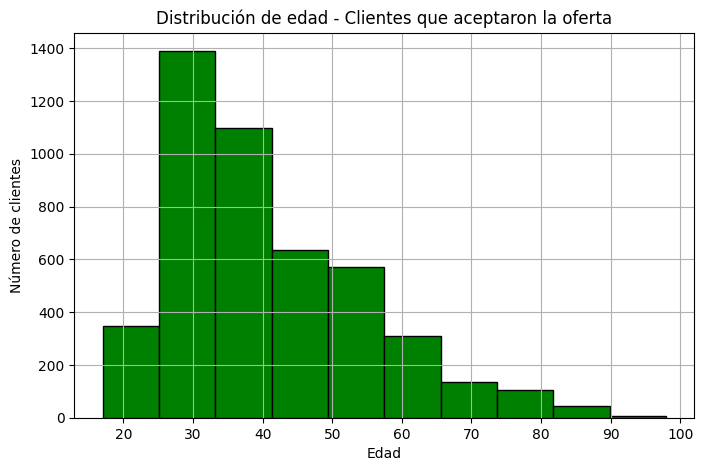

In [7]:
import matplotlib.pyplot as plt

df_yes = df[df['y'] == 'yes']

plt.figure(figsize=(8,5))
plt.hist(df_yes['age'], bins=10, color='green', edgecolor='black')
plt.title('Distribución de edad - Clientes que aceptaron la oferta')
plt.xlabel('Edad')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()


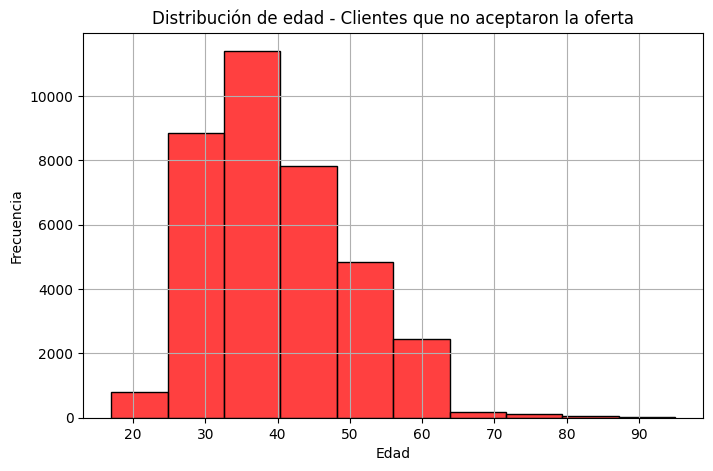

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=df[df['y'] == 'no'], x='age', bins=10, color='red')
plt.title('Distribución de edad - Clientes que no aceptaron la oferta')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


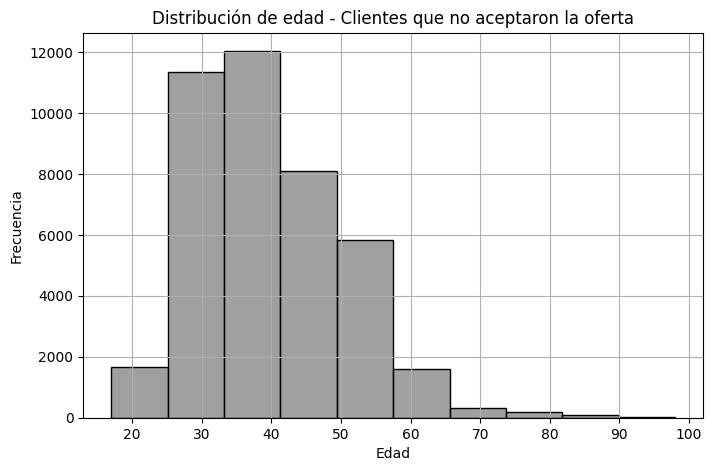

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', bins=10, color='gray')
plt.title('Distribución de edad - Clientes que no aceptaron la oferta')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Tras analizar la distribución de edad de los clientes que aceptaron y no aceptaron la oferta del banco, no se observan diferencias relevantes entre ambos grupos. Las curvas de distribución son similares, lo que sugiere que la edad no es un factor determinante en la decisión de contratación del producto ofrecido. Por tanto, la hipótesis que planteaba que las personas más jóvenes son más propensas a aceptar la oferta no queda respaldada por los datos.

## El estado civil influye en la decisión de aceptar la oferta, siendo algunos grupos más propensos que otros.


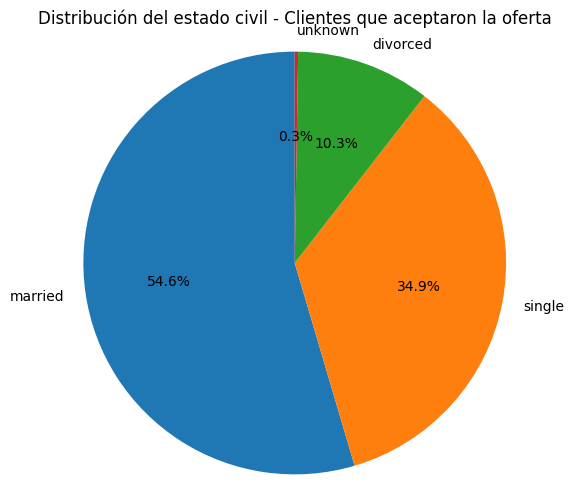

In [11]:
import matplotlib.pyplot as plt

df_yes = df[df['y'] == 'yes']

marital_counts = df_yes['marital'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del estado civil - Clientes que aceptaron la oferta')
plt.axis('equal')  # Para que el círculo sea redondo
plt.show()


Aunque los clientes casados representan el mayor grupo entre los que aceptan, estos datos deben interpretarse con cautela, ya que no tenemos aún la proporción total de cada estado civil en el conjunto general.

Aun así, se observan indicios de que el estado civil podría tener cierta relación con la decisión de aceptación, lo cual sugiere que podría ser una variable interesante a considerar en un análisis más detallado o en la construcción del modelo predictivo.

## Determinadas ocupaciones muestran una mayor probabilidad de contratar el producto ofrecido.

<ipython-input-12-f1d1b45e98c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_yes, y='job', order=df_yes['job'].value_counts().index, palette='viridis')


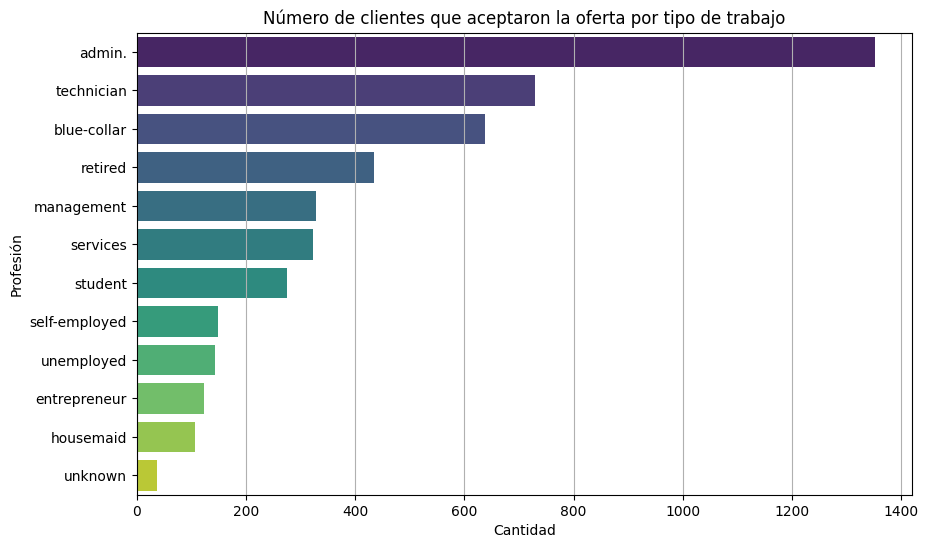

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los que aceptaron
df_yes = df[df['y'] == 'yes']

# Contar cuántos dijeron "yes" por tipo de trabajo
plt.figure(figsize=(10,6))
sns.countplot(data=df_yes, y='job', order=df_yes['job'].value_counts().index, palette='viridis')
plt.title('Número de clientes que aceptaron la oferta por tipo de trabajo')
plt.xlabel('Cantidad')
plt.ylabel('Profesión')
plt.grid(True, axis='x')
plt.show()


Los resultados muestran que ciertos perfiles profesionales destacan claramente entre quienes aceptaron la oferta bancaria. En particular, las personas con trabajos administrativos (admin.), técnicos (technician) y obreros industriales (blue-collar) representan la mayor parte de los casos positivos. Este patrón sugiere que la profesión podría tener un peso significativo en la decisión de aceptar el producto ofrecido, ya sea por factores económicos, disponibilidad de tiempo o nivel de confianza en la entidad.

## Las llamadas de mayor duración tienden a finalizar con una aceptación por parte del cliente.


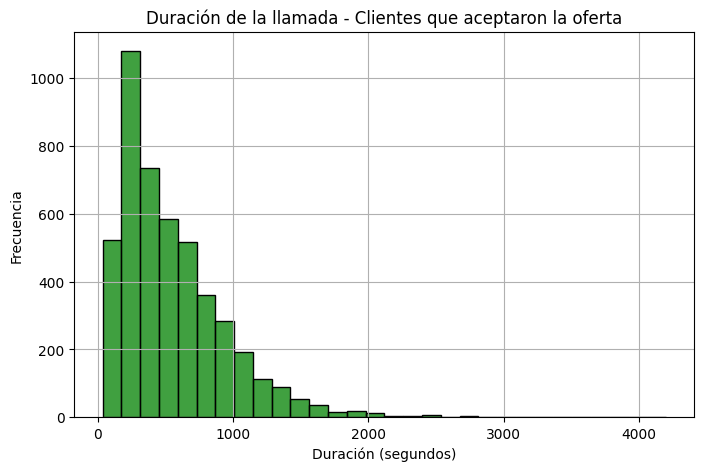

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df[df['y'] == 'yes'], x='duration', bins=30, color='green')
plt.title('Duración de la llamada - Clientes que aceptaron la oferta')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



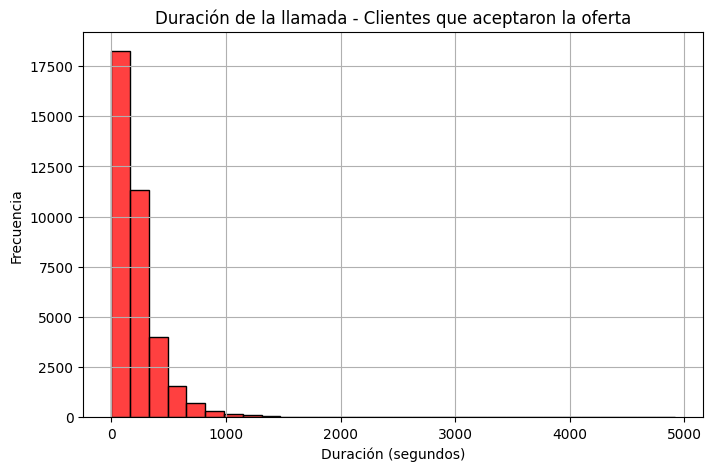

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df[df['y'] == 'no'], x='duration', bins=30, color='red')
plt.title('Duración de la llamada - Clientes que aceptaron la oferta')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Contrario a lo esperado, la mayoría de las contrataciones se realizaron tras llamadas relativamente breves. Aunque también hay casos de llamadas largas exitosas, la concentración de respuestas positivas en duraciones cortas sugiere que una llamada extensa no es un requisito para lograr una conversión.



## Un mayor número de intentos de contacto no se traduce necesariamente en una mayor tasa de éxito.

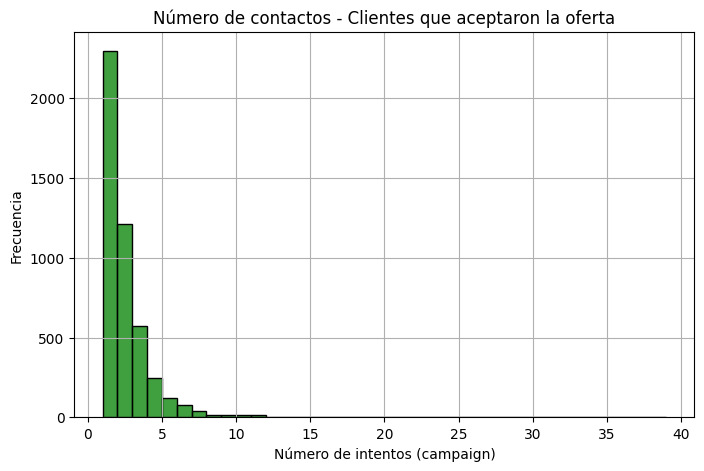

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df[df['y'] == 'yes'], x='campaign', bins=range(1, 40), color='green')
plt.title('Número de contactos - Clientes que aceptaron la oferta')
plt.xlabel('Número de intentos (campaign)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


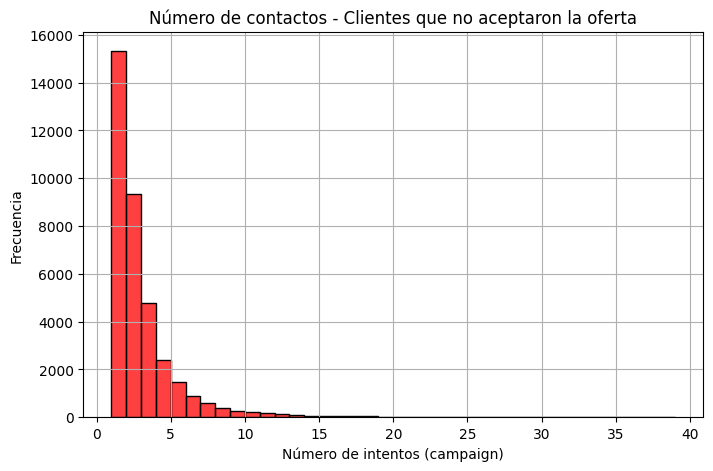

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df[df['y'] == 'no'], x='campaign', bins=range(1, 40), color='red')
plt.title('Número de contactos - Clientes que no aceptaron la oferta')
plt.xlabel('Número de intentos (campaign)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Los datos sugieren que contactar muchas veces a un cliente no aumenta significativamente la probabilidad de éxito. La mayoría de las contrataciones se dieron con pocos intentos, mientras que los rechazos se acumulan en clientes que fueron contactados reiteradamente. Esto apoya la hipótesis de que insistir más no garantiza mejores resultados.

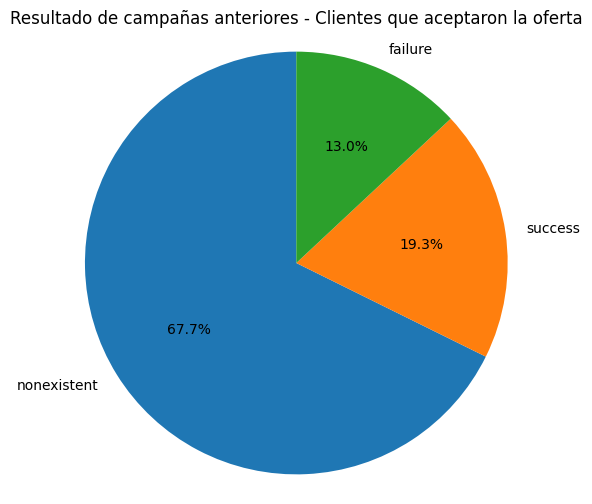

In [20]:
df_yes = df[df['y'] == 'yes']

poutcome_counts = df_yes['poutcome'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Resultado de campañas anteriores - Clientes que aceptaron la oferta')
plt.axis('equal')
plt.show()


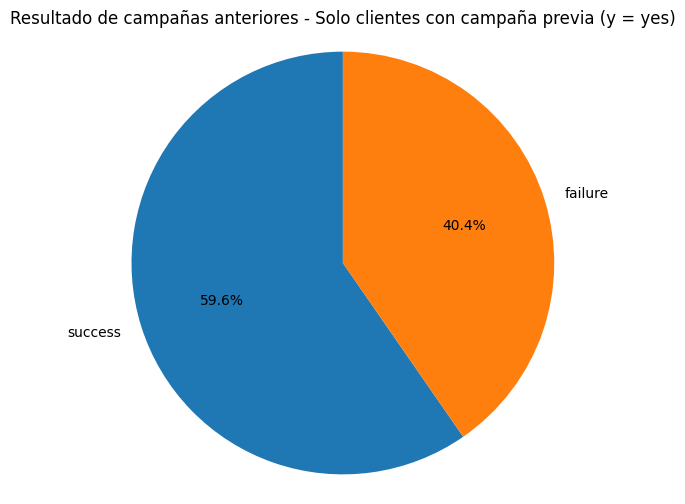

In [21]:

df_prev_campaign = df[(df['y'] == 'yes') & (df['poutcome'] != 'nonexistent')]

poutcome_filtered = df_prev_campaign['poutcome'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(poutcome_filtered, labels=poutcome_filtered.index, autopct='%1.1f%%', startangle=90)
plt.title('Resultado de campañas anteriores - Solo clientes con campaña previa (y = yes)')
plt.axis('equal')
plt.show()


Entre los clientes que participaron en campañas anteriores y aceptaron la nueva oferta, un 59,6 % venían de una campaña previa exitosa, frente al 40,4 % que no. Esto sugiere que un buen resultado anterior puede aumentar la probabilidad de conversión, aunque no garantiza el éxito por sí mismo.